# **CS490/590: HW1 - Linear Regression**


---


## Due Date 
**Febuary 7, 2022**

*Total 15 points*

---



# **Background**: #
The goal of this homework is for you to understand the principle of gradient descent and how it can be used to solve an optimization problem in the context of linear regression. Once, you understand how gradient descent works, understanding neural networks becomes much easier. 

Let's import the relevant libraries. 

In [ ]:
# import library for matrix computations
import numpy as np
# import libraries for displaying images and 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Now upload some data from the sklearn library.
We will look at the diabetes dataset for implementing a linear regression model. 

In [ ]:
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()
print(diabetes_data['DESCR']) # some description of the dataset

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
data = diabetes_data['data'] # select the data from the diabetes file
x_input = data[:, [0,2,3]] # we will only work with three of the features: AGE, BMI, and BLOOD PRESSURE
y_target = diabetes_data['target'] # select the diabetes progession level (our target variable)

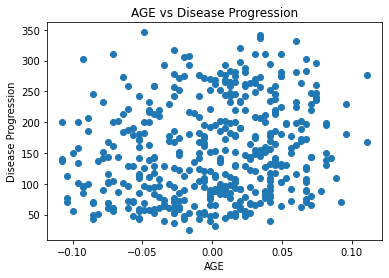

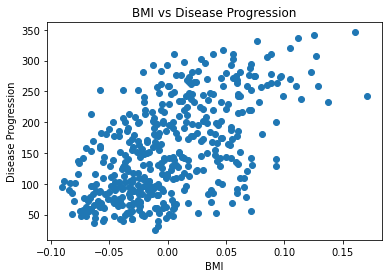

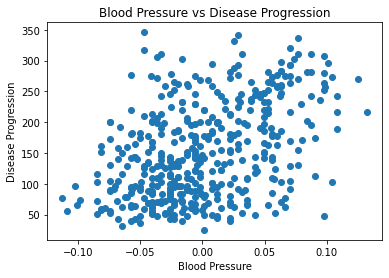

In [ ]:
# Individual plots for the three features:
plt.title('AGE vs Disease Progression')
plt.scatter(x_input[:, 0], y_target)
plt.xlabel('AGE')
plt.ylabel('Disease Progression')
plt.show()

plt.title('BMI vs Disease Progression')
plt.scatter(x_input[:, 1], y_target)
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.show()

plt.title('Blood Pressure vs Disease Progression')
plt.scatter(x_input[:, 2], y_target)
plt.xlabel('Blood Pressure')
plt.ylabel('Disease Progression')
plt.show()

According to the data above, the linear regression of *Disease Progression vs Blood Pressure and BMI* is defined by the formula: 

$$ y^{(i)} = w_1 x_1^{(i)} + w_2 x_2^{(i)} + w_3 x_3^{(i)} + w_0 $$

where the $i^{th}$ observation $x^{(i)}$ is reprensented with following features as:
$$x^{(i)}_1: Age$$
$$x^{(i)}_2: BMI$$
$$x^{(i)}_3: Blood Pressure$$

and the weights $w_{i}$ represent the contribution of each independent variable (or feature of each observation) to the predicition of the target variable $y^{(i)}$ (dependent variable).

---
## **Question 1a:** Define the cost function *(3 points)*

The cost function us given by:

$$\mathcal{E}(y, t) = \frac{1}{2N} \sum_{i=1}^N (y^{(i)}-t^{(i)})^2 $$

In the code below, provide the code for calculating the cost, using the non-vectorized form of the cost function.

In [ ]:
def cost(w1, w2, w3, w0, X, t):
    '''
    Provide the cost function in the non-vectorized form for 
    inputs `X` and targets `t`, at weights `w1`, `w2`, `w3` and `w0`.
    '''
    N = len(t)
    costs = 0
    for i in range(N):
        ### YOUR CODE HERE ###

        ######################
    costs = costs / (2*N)    
    return costs

IndentationError: ignored

## **Question 1b:** Define the cost function in vectoried form *(3 points)* *italicized text*

For the above cost function, now you will provide the vectorized form in the code below. The vectorized form of the cost function is defined below as:

$$\mathcal{E}(y, t) = \frac{1}{2N} \| \mathbf{X} \mathbf{w} + \mathit{w_0} \mathbf{1} - \mathbf{t} \| ^2$$ 

In [ ]:
def cost_vectorized(w1, w2, w3, w0, X, t):
    '''
    Provide the cost function in vectorized form for 
    inputs `X` and targets `t`, at weights `w1`, `w2`, `w3` and `w0`.
    '''
    ### YOUR CODE HERE ###

    ######################
    return cost

You can check to see if your answers of the vectorized and non-vectorized form match, with the following two commands:

In [ ]:
print('The cost obtained from the vectorized cost function:', cost_vectorized(3, 5, 2, 20, x_input, y_target))
print('The cost obtained from the non-vectorized cost function:', cost(3, 5, 2, 20, x_input, y_target))


---

## **Question 2a:** Exact solution to linear regression formula *(3 points)* 
You need to provide the exact solution to the linear regression formula defined above in the Background section.

To solve this problem, use the exact linear algebra solution and ignore the bias term (add an extra feature instead to $\bf{X}$).

In [ ]:
# manipulate the input matrix 
# add an extra feature (column in the input) that are just all ones

### YOUR CODE HERE ###

######################

In [ ]:
def exact_soln(X, t):
    '''
    Solve linear regression exactly. (fully vectorized)
    
    Given `X` - NxD matrix of inputs
          `t` - target outputs
    Returns the optimal weights as a D-dimensional vector
    '''
    ### YOUR CODE HERE ###
  
    ######################
    return sol

In [ ]:
# display solution
sol = exact_soln(x_in, y_target)
print('w1:', sol[0]);
print('w2:', sol[1]);
print('w3:', sol[2]);
print('w0:', sol[3]);

## **Question 2b:** Gradient descent solution of linear regression *(6 points)*

Now you will solve the linear regression formula using the iterative technique of gradient descent. Your final answer of the weights should match the exact solution above in **2a**. 


First define the gradient function below *(3 points)*:


$$ \nabla \mathcal{E}(\mathbf{w}) = \frac{\partial \mathcal{E}}{\partial \mathbf{w}} = \frac{1}{N}\mathbf{X}^{\textrm{T}}(\mathbf{y}-\mathbf{t}) $$

In [ ]:
# Vectorized gradient function
def gradfn(weights, X, t):
    '''
    Given `weights` - a current "Guess" of what our weights should be
          `X` - matrix of shape (N,D) of input features
          `t` - target y values
    Return gradient of each weight evaluated at the current value
    '''
    ### YOUR CODE HERE ###
    
    ######################
    return dw

Then define the gradient descent below *(3 points)*:


$$ \mathbf{w} \leftarrow \mathbf{w} - \alpha \nabla \mathcal{E}(\mathbf{w}) $$

which will be looped until convergence.

In [ ]:
def solve_via_gradient_descent(X, t, print_every=50000,
                               niter=1000000, alpha=0.01):
    '''
    Given `X` - matrix of shape (N,D) of input features
          `t` - target y values
    Solves for linear regression weights.
    Return weights after `niter` iterations.
    '''
    N, D = np.shape(X)
    w = np.zeros([D]) # initialize all the weights to zeros
    
    for k in range(niter):
        ### YOUR CODE HERE ###

        #######################
        if k % print_every == 0:
            print('Weight after %d iteration: %s' % (k, str(w)))
    
    return w

In [ ]:
# display solution
sol_2 = solve_via_gradient_descent( X=x_in, t=y_target)
print('\n')
print('w1:', sol_2[0]);
print('w2:', sol_2[1]);
print('w3:', sol_2[2]);
print('w0:', sol_2[3]);